import proper packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

EXPLORATION
open the train and the test datasets, gather them into an all_data_set and explore values

In [77]:
train = pd.read_csv(r'C:\Users\jeanm\Anaconda3\envs\test\books\titanic\train.csv', delimiter=',')
print(train.shape)
test=pd.read_csv(r'C:\Users\jeanm\Anaconda3\envs\test\books\titanic\test.csv', delimiter=',')
print(test.shape)

(891, 12)
(418, 11)


concatenate the 2 datasets into one for data exploration and feature engineering

In [78]:
train_all=pd.concat([train, test],sort=True).reset_index(drop=True)
print(train_all.shape)

(1309, 12)


list of the column names of train dataset

In [79]:
train_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

analyse of each feature of the dataset

In [80]:
train_all.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

263 ages missing, 1014 cabins missing, 2 embarked missing, 1 fare missing, 418 survived missing (to be predicted ;))

In [81]:
train_all['Survived']=train_all['Survived'].astype('category')
train_all.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

549 died, 342 survived

In [82]:
train_all['Sex']=train_all['Sex'].astype('category')
train_all.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

466 female and 843 male on the boat in the dataset

In [83]:
train_all['Pclass']=train_all['Pclass'].astype('category')
train_all.Pclass.value_counts().sort_values()

2    277
1    323
3    709
Name: Pclass, dtype: int64

3 different classed: 323 in 1st class, 277 in 2nd class and 709 in 3rd class

29.9
28.0
263


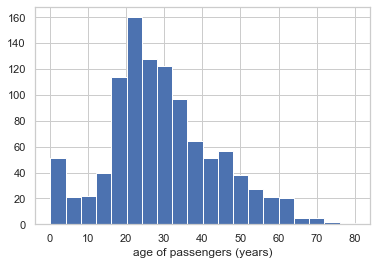

In [84]:
train_all['Age']=train_all['Age'].astype('float')
plt.figure(1)
train_all['Age'].hist(bins=20)
plt.xlabel('age of passengers (years)')
plt.show
print(round(train_all['Age'].mean(),1))
print(round(train_all['Age'].median(),1))
print(train_all['Age'].isnull().sum())

mean age is 30 years old. It goes from 0 (babies x40) to more than 70 years old (olderies). 
there are 263 people where we are missing the age.

0.5
       Age  Cabin  Embarked  Fare  Name  Parch  PassengerId  Pclass  Sex  \
SibSp                                                                      
0      685    171       889   890   891    891          891     891  891   
1      280    110       319   319   319    319          319     319  319   
2       36     10        42    42    42     42           42      42   42   
3       16      4        20    20    20     20           20      20   20   
4       22      0        22    22    22     22           22      22   22   
5        6      0         6     6     6      6            6       6    6   
8        1      0         9     9     9      9            9       9    9   

       Survived  Ticket  
SibSp                    
0           608     891  
1           209     319  
2            28      42  
3            16      20  
4            18      22  
5             5       6  
8             7       9  
0


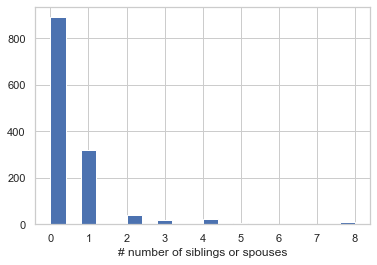

In [85]:
plt.figure(2)
train_all['SibSp'].hist(bins=20)
plt.xlabel('# number of siblings or spouses')
plt.show
print(round(train_all['SibSp'].mean(),1))
print(train_all.groupby(by='SibSp').count())
print(train_all['SibSp'].isnull().sum())

891 passengers are sole, 319 have 1 spouse/sibling, and the rest are 'adults' families

0.4
0


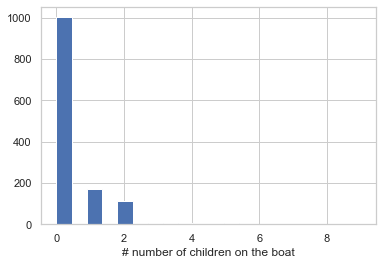

In [86]:
plt.figure(3)
train_all['Parch'].hist(bins=20)
plt.xlabel('# number of children on the boat')
plt.show
print(round(train_all['Parch'].mean(),1))
train.groupby(by='Parch').count()
print(train_all['Parch'].isnull().sum())

1000 passengers don't have children, around 200 got one, around 100 got 2

In [87]:
print(train_all['Cabin'].isnull().sum())
train_all['Cabin'].isnull().sum()/train_all.shape[0]*100
train_all.groupby(by=['Pclass']).count().Cabin

1014


Pclass
1    256
2     23
3     16
Name: Cabin, dtype: int64

there is no cabin information for 1014 passengers (77.5%).  
We will not use the cabin info so.  
cabin info is for first class passengers: 256 cabins are 1st class, 23 are 2nd class, 16 are 3rd class

mean ticket fare is 33.3 USD, minimum ticket fare is 0.0 USD, maximum ticket fare is 512.3 USD
1
Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64


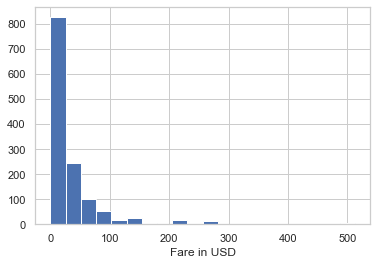

In [88]:
plt.figure(4)
train_all['Fare'].hist(bins=20)
plt.xlabel('Fare in USD')
plt.show
print("mean ticket fare is {0} USD, minimum ticket fare is {1} USD, maximum ticket fare is {2} USD".format(round(train_all['Fare'].mean(),1), round(train_all['Fare'].min(),1),round(train_all['Fare'].max(),1)))
print(train_all['Fare'].isnull().sum())
print(train_all.groupby(by='Pclass').Fare.mean())

mean fare is 33USD, there is a great disparity of fares, from 0 USD to 512USD (mean fares are: Pclass1=87.5USD, Pclass2=21.2USD, Pclass3=13.3USD)

In [89]:
print(train_all['Embarked'].isnull().sum())
train_all.Embarked.value_counts()

2


S    914
C    270
Q    123
Name: Embarked, dtype: int64

2 person are missing there embarkment code; there are 3 possible embarking codes: C (Cherbourg), Q (Queenstown) and S (Southampton)  
S is the most frequent

In [90]:
train_all['Ticket'].isnull().sum()

0

CONSOLIDATION OF THE DATA SET

first: fill in the missing ages

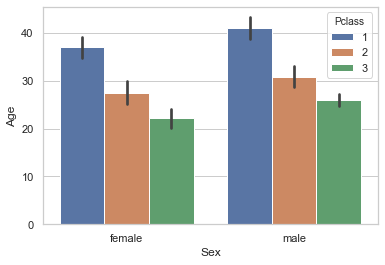

In [91]:
sns.set(style="whitegrid")
ax = sns.barplot(x=train_all["Sex"],y=train_all['Age'],hue=train_all['Pclass'])

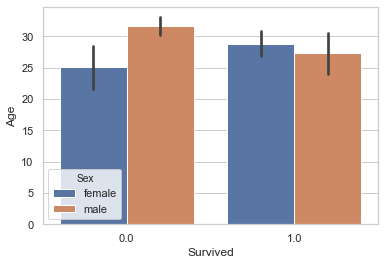

In [92]:
ax = sns.barplot(x=train_all["Survived"],y=train_all['Age'],hue=train_all['Sex'])

let's make a routine to fill in the missing age data with the median value from the corresponding Class and Sex category

In [93]:
#compute the mean values and store in a list
med_age=train_all.groupby(by=['Sex','Pclass']).median()
med_age=med_age['Age']
print(med_age)

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64


In [94]:
train_all['Age_fill']=np.zeros(train_all.shape[0])
for i in range(train_all.shape[0]):
    a=0
    b=0
    c=0
    if np.isnan(train_all.loc[i,'Age']):
        if train_all.loc[i,'Sex']=='Male':
            a =3
        else:
            a=0
        if train_all.loc[i,'Pclass']==1:
            b=0
        elif train_all.loc[i,'Pclass']==2:
            b=1
        else:
            b=2
        c=a+b
        train_all.loc[i,'Age_fill']=med_age[c]
    else:
        train_all.loc[i,'Age_fill']=train_all.loc[i,'Age']

print(train_all['Age'].isnull().sum())
print(train_all['Age_fill'].isnull().sum())
    
            

263
0


In [95]:
#getting a summary of the null values
train_all.isnull().sum()


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Age_fill          0
dtype: int64

Second: clean the Title column into only 4 groups = Mr, Mrs, Miss, and Master

In [97]:
train_all['Title']=train_all['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_all.Title.value_counts()


Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Capt          1
Lady          1
Mme           1
Jonkheer      1
Sir           1
Countess      1
Dona          1
Don           1
Name: Title, dtype: int64

In [98]:
# we replace the titles for gathering into categories
train_all.Title=train_all.Title.replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Master')
train_all.Title=train_all.Title.replace(['Countess','Dona','Mme','Lady'],'Mrs')
train_all.Title=train_all.Title.replace(['Mlle','Ms'],'Miss')
train_all.Title.value_counts()

Mr        757
Miss      264
Mrs       201
Master     87
Name: Title, dtype: int64

Fourth: family size, Mother and Free tickets are considered as new variables too

In [99]:
train_all['FamilySize'] = train_all.SibSp + train_all.Parch + 1
train_all['Mother'] = np.where((train_all.Title=='Mrs') & (train_all.Parch >0),1,0)
train_all['Free'] = np.where(train_all['Fare']==0, 1,0)

we create a feature to gather family sizes: 'Alone','Small=<2','Medium=<4', 'large>=5'

In [100]:
train_all['Alone']=np.where((train_all.FamilySize==1),1,0)
train_all['SmallFamily']=np.where((train_all.FamilySize>1)&(train_all.FamilySize<=2),1,0)
train_all['MediumFamily']=np.where((train_all.FamilySize>2)&(train_all.FamilySize<=4),1,0)
train_all['LargeFamily']=np.where((train_all.FamilySize>4),1,0)

create an age feature by splitting continuous variable AGE into different groups: babies <2, young child<6, adolescent<16, adult<45, old >45

In [101]:
train_all['baby']=np.where((train_all.Age_fill<2),1,0)
train_all['young_child']=np.where((train_all.Age_fill<6)&(train_all.Age_fill>=2),1,0)
train_all['ado']=np.where((train_all.Age_fill<16)&(train_all.Age_fill>=6),1,0)
train_all['adult']=np.where((train_all.Age_fill<45)&(train_all.Age_fill>=16),1,0)
train_all['old']=np.where((train_all.Age_fill>=45),1,0)

In [102]:
train_all.isnull().sum()

Age              263
Cabin           1014
Embarked           2
Fare               1
Name               0
Parch              0
PassengerId        0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
Age_fill           0
Title              0
FamilySize         0
Mother             0
Free               0
Alone              0
SmallFamily        0
MediumFamily       0
LargeFamily        0
baby               0
young_child        0
ado                0
adult              0
old                0
dtype: int64

Fifth: we fill the 2 missing embarked by the most represented category = 'S'

In [103]:
train_all['Embarked']=train_all['Embarked'].fillna('S')
train_all['Fare']=train_all['Fare'].fillna(train_all['Fare'].mean(skipna=True))
train_all.isnull().sum()

Age              263
Cabin           1014
Embarked           0
Fare               0
Name               0
Parch              0
PassengerId        0
Pclass             0
Sex                0
SibSp              0
Survived         418
Ticket             0
Age_fill           0
Title              0
FamilySize         0
Mother             0
Free               0
Alone              0
SmallFamily        0
MediumFamily       0
LargeFamily        0
baby               0
young_child        0
ado                0
adult              0
old                0
dtype: int64

create bins for the continuous ticket Fare variable: we create 20 bins

In [104]:
train_all['Fare_bin'] = pd.qcut(train_all['Fare'], 5)
#train_all['Fare_bin'].head(20)

how to extract some features from the ticket values ? idea is to count the frequency of tickets for each ticket, this would complete the information from family size for groups which are not families but travelling together

In [105]:
train_all['Ticket_Frequency'] = train_all.groupby('Ticket')['Ticket'].transform('count')
#plt.hist(train_all['Ticket_Frequency'],bins=20)

Extract the deck informations from the cabin for those where we have

In [106]:
train_all['Cabin'].head()
train_all['Deck']=np.zeros(train_all.shape[0])
for i in range(train_all.shape[0]):
    if pd.isnull(train_all.loc[i,'Cabin'])!=True:
        train_all.loc[i,'Deck']=train_all.loc[i,'Cabin'][0]
    else:
        train_all.loc[i,'Deck']='M'
            
train_all.Deck.value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [107]:
#is there a link between decks and classes? Is there an order of decks?
train_all.groupby(by=['Pclass','Deck']).count().Sex

Pclass  Deck
1       A        22.0
        B        65.0
        C        94.0
        D        40.0
        E        34.0
        F         NaN
        G         NaN
        M        67.0
        T         1.0
2       A         NaN
        B         NaN
        C         NaN
        D         6.0
        E         4.0
        F        13.0
        G         NaN
        M       254.0
        T         NaN
3       A         NaN
        B         NaN
        C         NaN
        D         NaN
        E         3.0
        F         8.0
        G         5.0
        M       693.0
        T         NaN
Name: Sex, dtype: float64

First classes are on Deck A/B/C/D/E and "M"  
Second classes are on Deck D/E/F and "M"  
Thirs classes are mostly on deck "M"

In [108]:
train_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Age_fill', 'Title',
       'FamilySize', 'Mother', 'Free', 'Alone', 'SmallFamily', 'MediumFamily',
       'LargeFamily', 'baby', 'young_child', 'ado', 'adult', 'old', 'Fare_bin',
       'Ticket_Frequency', 'Deck'],
      dtype='object')

In [109]:
train_all.dtypes

Age                  float64
Cabin                 object
Embarked              object
Fare                 float64
Name                  object
Parch                  int64
PassengerId            int64
Pclass              category
Sex                 category
SibSp                  int64
Survived            category
Ticket                object
Age_fill             float64
Title                 object
FamilySize             int64
Mother                 int32
Free                   int32
Alone                  int32
SmallFamily            int32
MediumFamily           int32
LargeFamily            int32
baby                   int32
young_child            int32
ado                    int32
adult                  int32
old                    int32
Fare_bin            category
Ticket_Frequency       int64
Deck                  object
dtype: object

In [110]:
# we drop the old columns that have been featured into good new ones
train_all=train_all.drop(['PassengerId','Age','SibSp','Parch','Ticket','Cabin','Name','Fare'],axis=1)
print(train_all.shape)
train_all.columns

(1309, 21)


Index(['Embarked', 'Pclass', 'Sex', 'Survived', 'Age_fill', 'Title',
       'FamilySize', 'Mother', 'Free', 'Alone', 'SmallFamily', 'MediumFamily',
       'LargeFamily', 'baby', 'young_child', 'ado', 'adult', 'old', 'Fare_bin',
       'Ticket_Frequency', 'Deck'],
      dtype='object')

In [111]:
train_all.dtypes

Embarked              object
Pclass              category
Sex                 category
Survived            category
Age_fill             float64
Title                 object
FamilySize             int64
Mother                 int32
Free                   int32
Alone                  int32
SmallFamily            int32
MediumFamily           int32
LargeFamily            int32
baby                   int32
young_child            int32
ado                    int32
adult                  int32
old                    int32
Fare_bin            category
Ticket_Frequency       int64
Deck                  object
dtype: object

In [112]:
# we add counts for Embarked, Pclass, Sex, Title, FamilySize, Fare_bin, Deck
for i in ['Embarked', 'Pclass', 'Sex', 'Title','FamilySize', 'Fare_bin','Deck']:
    counts = train_all.loc[:,i].value_counts().to_dict()
    train_all[''+i+'_counts'] = train_all.loc[:,i].map(counts)

we copy survived column into a variable

In [113]:
Survived=train_all['Survived']
Survived.shape

(1309,)

it is crucial to create dummy variables for all the categorical variables using the pd.get_dummies() function

In [115]:
train_all=pd.get_dummies(train_all)
train_all=train_all.drop(['Survived_0.0','Survived_1.0'],axis=1)
train_all=train_all.iloc[:,:-10]
train_all['Survived']=Survived
train_all.columns
train_all.isnull().sum()

Age_fill                        0
FamilySize                      0
Mother                          0
Free                            0
Alone                           0
SmallFamily                     0
MediumFamily                    0
LargeFamily                     0
baby                            0
young_child                     0
ado                             0
adult                           0
old                             0
Ticket_Frequency                0
Embarked_counts                 0
Title_counts                    0
FamilySize_counts               0
Deck_counts                     0
Embarked_C                      0
Embarked_Q                      0
Embarked_S                      0
Pclass_1                        0
Pclass_2                        0
Pclass_3                        0
Sex_female                      0
Sex_male                        0
Title_Master                    0
Title_Miss                      0
Title_Mr                        0
Title_Mrs     


******
Now, let's run some machine learning models on the dataset to predic the survivability

as a first step, we are going to split the train data set into a TRAIN and TEST data set to check for the accuracy of the model. I use "train_test_split" from sklearn  
We can also consider stratifying the train test split with the ratio of survived

In [120]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler=StandardScaler()

In [138]:
from sklearn.model_selection import train_test_split
train_good=train_all[train_all.Survived.isnull()==False]
X=train_good.drop('Survived',axis=1)
X_scale=standard_scaler.fit_transform(X)
#print(X.columns)
print(X.shape)
Y=train_good['Survived']
print(Y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2019, stratify=Y)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(891, 44)
(891,)
(623, 44) (268, 44) (623,) (268,)


Then, we are training some models on the test dataset

In [139]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

gb = GradientBoostingClassifier(n_estimators=2500, random_state=2018)
rf = RandomForestClassifier(n_estimators=500, max_depth=5,min_samples_split=2,random_state=2)
knn = KNeighborsClassifier(n_neighbors=5)
nn = MLPClassifier((100,100, 60), early_stopping=False, max_iter=2000, random_state=2)

Results = pd.DataFrame({'Model': [],'Accuracy Score': []})

gb.fit(X_train, y_train)
Y_pred= gb.predict(X_test)
res = pd.DataFrame({"Model":['GradientBoostingClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

rf.fit(X_train, y_train)
Y_pred= rf.predict(X_test)
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

knn.fit(X_train, y_train)
Y_pred= knn.predict(X_test)
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

nn.fit(X_train, y_train)
Y_pred= nn.predict(X_test)
res = pd.DataFrame({"Model":['NeuralNetwork'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

Results

,Model,Accuracy Score
0,GradientBoostingClassifier,0.779851
0,RandomForestClassifier,0.805970
0,KNeighborsClassifier,0.813433
0,NeuralNetwork,0.757463


the randomForestClassifier offers the best accuracy score: 0.81
Now, we want to apply this prediction to the test data set 
we will then first have to transform the test data set appropriately in order to feed the best model built;

In [140]:
test_good=train_all[train_all.Survived.isnull()==True]
test_good=test_good.drop(['Survived'],axis=1)
test_good_scale=standard_scaler.transform(test_good)
print(test_good.shape)
print(test_good.isnull().sum())
print(test_good.columns)

(418, 44)
Age_fill                      0
FamilySize                    0
Mother                        0
Free                          0
Alone                         0
SmallFamily                   0
MediumFamily                  0
LargeFamily                   0
baby                          0
young_child                   0
ado                           0
adult                         0
old                           0
Ticket_Frequency              0
Embarked_counts               0
Title_counts                  0
FamilySize_counts             0
Deck_counts                   0
Embarked_C                    0
Embarked_Q                    0
Embarked_S                    0
Pclass_1                      0
Pclass_2                      0
Pclass_3                      0
Sex_female                    0
Sex_male                      0
Title_Master                  0
Title_Miss                    0
Title_Mr                      0
Title_Mrs                     0
Fare_bin_(-0.001, 7.854]      

Now we can apply the built model on test_good and save it in a csv file

In [143]:
result=pd.DataFrame(np.zeros((test.shape[0],2)),columns=['PassengerId','Survived'])
result['Survived']=rf.predict(test_good).astype(int)
result['PassengerId']=test['PassengerId']
print(result.head(5))
result[['PassengerId','Survived']].to_csv(r"C:\Users\jeanm\Anaconda3\envs\test\books\titanic\submissionJM18.csv",index=False)
print("done1")

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
done1


In [144]:
result.groupby('Survived').count()

,PassengerId
Survived,
0,257
1,161


the next step is to try to optimize the random forest classifier

<function matplotlib.pyplot.show(*args, **kw)>

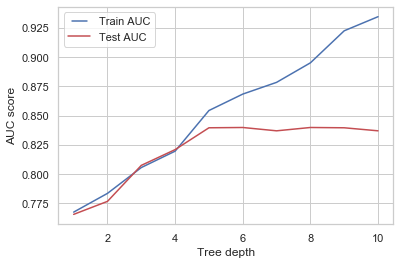

In [126]:
#depths exploration
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf_opt = RandomForestClassifier(n_estimators=500, max_depth=max_depth, n_jobs=-1)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show

the max tree depth is around 5

category


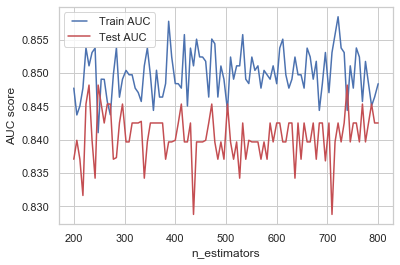

In [127]:
#n_estimators exploration
n_est = np.linspace(200, 800, 100, endpoint=True,dtype='int')
train_results = []
test_results = []
for n_ests in n_est:
   rf_opt = RandomForestClassifier(n_estimators=n_ests,max_depth=5, n_jobs=-1)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_est, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_est, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show
print(y_train.dtype)

In [62]:
rf_opt = RandomForestClassifier(n_estimators=500, max_depth=5,min_samples_split=2,random_state=2018)
rf_opt.fit(X_train, y_train)
result=pd.DataFrame(np.zeros((test.shape[0],2)),columns=['PassengerId','Survived'])
result['Survived']=rf_opt.predict(test_good).astype(int)
result['PassengerId']=test['PassengerId']
print(result.head(5))
result[['PassengerId','Survived']].to_csv(r"C:\Users\jeanm\Anaconda3\envs\test\books\titanic\submissionJM17.csv",index=False)
print("done1")

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
done1


In [63]:
result.groupby('Survived').count()

,PassengerId
Survived,
0,262
1,156


the saved result is submitted to the Kaggle platform